<a href="https://colab.research.google.com/github/shimossa/ISYS5002_ELP_2021/blob/main/ISYS5002_ELP_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ELP Question Two

In [ ]:
def get_url(search_term, template): # A function that passes through the search_term and template arguments
 search_term = search_term.replace(' ', '+') # Defines the variable search_term where the blanks are replaced with a +
 url = template.format(search_term) # formats the url with the parameters defined in search_term
 url += '&page={}' # adds '&page={}' to the end of the url
 return url # stores the url generated in the function to be called

##ELP Question Three

"Calculate a car’s fuel economy after
reading in the distance travelled and amount of petrol used." 


The fuel economy is
calculated by the following formula:

*kmPerLitre = kilometers / litres.*

#Original Code
```
def efficiency(dist, gas)
 return dist/gas

km = input ("How far did your car travel? (In kilometers?) )
liters = input ("How much gas did you use? (In liters)"
MPG = efficiency(dist_traveled, Liters)
print MPG
```

In [ ]:
def efficiency(dist_traveled, fuel): #Added a colon to define the function (Syntax Error)
 return dist_traveled/fuel #Fixed logic errors by making varieables consistent

dist_traveled = int(input("How far did your car travel? (In kilometers?) ")) #Closed the quotation (Syntax Error), changed variable name (Logic)
fuel = int(input("How much fuel did you use? (In liters) ")) #Closed the quotation (Syntax Error), changed variable name (Logic)
kpl = efficiency(dist_traveled, fuel) #Changed variable name for consistency (Km/L) and fixed the variables (logic errors)
print("Your fuel economy was " + str(kpl) + "Km/L") #Fixed syntax error and enhanced the display of the output


How far did your car travel? (In kilometers?) 56
How much fuel did you use? (In liters) 23
Your fuel economy was 2.4347826086956523Km/L


##ELP Question Three

*Write a program the reads in sales.csv and calculates the maximum, minimum and average
profit for each country in the Australia and Oceania region. For each country in the
Australia and Oceania region the plot their total profit*

**Problem Statement**
"Calculate the Max, Min, Ave for the Ocenania region and plot the total profit of the countries in that region"

**Development**
1.   Input: CSV file
2.   Output: min, max, average and total on a table, plot of the totals
3. Processing: pandas

**Algorithm**
1. read the csv file
2. copy the table 
3. fix NaN data / clean the data
4. filter the OCE/AUS countries
5. for the OCE/AUS countries find the min, max and average profit
6. Display the new data on a table and save it 
7. plot the total profit for those countries in that region 







#Issues Encountered and Resolution

##Min, Max and Mean

Finding a way to retreive the min, max and average of the data.
As the program will run off a csv file, it's better for the program to be adaptable in that it will be able to do this for all the CSV files that the user creates (provided they're the same format).

While using :

```
column = oce_df["Total Profit"]
max_value = column.max()
min_value = column.min()
ave_value = column.mean()


print(max_value)
print(min_value)
print(ave_value)
```
was a simple way to retreive the data, it was difficult to actually provide the country name along with it. 

```
max_country = oce_df.loc[oce_df['Total Profit'].idxmax()]
min_country = oce_df.loc[oce_df['Total Profit'].idxmin()]

print(max_country)
print(min_country)
```

was another way that I tried to get the data however, it did not appear clean, and would be difficult to read by the user. and it still contained ```Name: 9, dtype: object``` in the result which  Idid not want.

```
pdmax = oce_df[oce_df["Total Profit"]==oce_df["Total Profit"].min()]
pdmin = oce_df[oce_df["Total Profit"]==oce_df["Total Profit"].max()]

print(pdmax)
print(pdmin)
```

also resulted in issues where the data appeared as 

```
       Country Item Type Sales Channel  ... Total Revenue Total Cost  Total Profit
3  New Zealand    Fruits        Online  ...      20404.71   15134.04       5270.67

[1 rows x 13 columns]
  Country  Item Type Sales Channel  ... Total Revenue  Total Cost  Total Profit
9  Samoa   Cosmetics        Online  ...     4220728.8  2542187.82    1678540.98

[1 rows x 13 columns]
```

#Min, Max, Mean Resolution

The resolution I devised involved using iloc, however with specific points in a remade csv file. I arranged the OCE/AUS filtered table by profit, and then saved that as a seperate CSV file. Using this new csv file ('sales_fixed.csv") I was there able to use iloc to retrieve the first and last (i.e. min and max) and then find the mean using a simple .mean() command. 

```
max_prof = dff.iloc[0,0]
max_country = dff.iloc[0,1]
min_prof = dff.iloc[10,0]
min_country = dff.iloc[10,1]
mean_prof = round(dff["Total Profit"].mean(),2)

print(max_country + str(max_prof))
print(min_country + str(min_prof))
print("The average for the total profit for the region is " + str(mean_prof))
```
I did attempt to use .head() and .tail() however they also displayed the following which was unusable in the way I had intended to use the data.

```
your max value is0    1678540.98
Name: Total Profit, dtype: float64
10    5270.67
Name: Total Profit, dtype: float64
```

#Bar Plot Problem and Resolution

The question does not outline specifically what sort of plot is to be used, however I felt that using a bar chart would be most appropriate. That being said, uplon attempting create a bar chart a plethora of issues arose.

Firstly, the dataset used has three instances of Australia. Normally this wouldnt be an issues since the question is merely asking for total revenue, however, since the context of the question isn't clear, I assumed that the dates and orders in which the revenue was made held importance to the overall table. I did attempt to add the "Australia" data together using groupby functions

```
Total Revenue	Total Cost
Total Profit	Country		
5270.67	New Zealand	20404.71	15134.04
13009.18	Kiribati	50363.34	37354.16
60418.38	Australia	140287.40	79869.02
146875.14	Federated States of Micronesia	445033.55	298158.41
147031.74	Australia	445508.05	298476.31
285087.64	Solomon Islands	759202.72	474115.08
337937.60	East Timor	2492526.12	2154588.52
369155.00	Australia	1904138.04	1534983.04
727423.20	Fiji	1082418.40	354995.20
951410.50	Tuvalu	2533654.00	1582243.50
1678540.98	Samoa	4220728.80	2542187.82
```
(This is after I trialed this function using a table that dropped the following columns) 
```
oce_df.drop(['Region', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost'], axis=1, inplace=True)
```


However this was usually the result. This would not have affected the final results for the min/ max, but perhaps the average.

That being said, attempting to plot the data on a bar graph also led to issues. Firstly, the text of the countries overlapped eachother and was unreadable and thus using this command;

```
fig, ax = plt.subplots()
ax.bar(dff["Country"], dff["Total Profit"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()
```

Only plotted the top 9 in the list, ommitting the rest, to which I could not find a fix for. Therefore, the next best option for the plot was a scatter plot, as it would 'accurately' display the total amount on the graph.

Finally with the scatter plot saving the image has run into some issues where the saved image will be cut off unless saved directly from the notebook. Attempting to fix this issue with ```plt.figure(figsize=(8, 8), dpi=80)``` results in a blank image.

In [1]:
# import libraries 
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the csv file 
df = pd.read_csv('sales.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
#filter to the OCE/AUS region
oce_df = df.loc[df['Region'] == 'Australia and Oceania']

#Reset the index to clean the data and drop the old index
oce_df = oce_df.reset_index(drop=True)

oce_df

In [ ]:
def data_filter(): 
  #filter to the OCE/AUS region
  df = pd.read_csv('sales.csv')
  oce_df = df.loc[df['Region'] == 'Australia and Oceania']

  #Reset the index to clean the data and drop the old index
  oce_df = oce_df.reset_index(drop=True)

  #Dropping a redundant column
  oce_df.drop(['Region'], axis=1, inplace=True)

  #Sorting data in a way to display it using groupby
  #This probably the best way to display information without compromising the data itself

  organised_data = oce_df.groupby(["Total Profit"]).max().sort_values('Total Profit', ascending=False)

  organised_data.to_csv('sales_fixed.csv')

In [7]:
#Sorting data in a way to display it using groupby
organised_data = oce_df.groupby(["Total Profit"]).max().sort_values('Total Profit', ascending=False)


organised_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
Total Profit,,,,,,,,,,,,,
1678540.98,Australia and Oceania,Samoa,Cosmetics,Online,H,7/20/2013,670854651,8/7/2013,9654,437.20,263.33,4220728.80,2542187.82
951410.50,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50
727423.20,Australia and Oceania,Fiji,Clothes,Offline,C,6/30/2010,647876489,8/1/2010,9905,109.28,35.84,1082418.40,354995.20
369155.00,Australia and Oceania,Australia,Office Supplies,Online,C,10/27/2015,158535134,11/25/2015,2924,651.21,524.96,1904138.04,1534983.04
337937.60,Australia and Oceania,East Timor,Meat,Online,L,7/31/2012,322067916,9/11/2012,5908,421.89,364.69,2492526.12,2154588.52
285087.64,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08
147031.74,Australia and Oceania,Australia,Beverages,Offline,H,7/7/2014,240470397,7/11/2014,9389,47.45,31.79,445508.05,298476.31
146875.14,Australia and Oceania,Federated States of Micronesia,Beverages,Online,C,10/28/2014,217221009,11/15/2014,9379,47.45,31.79,445033.55,298158.41
60418.38,Australia and Oceania,Australia,Cereal,Offline,H,6/9/2013,450563752,7/2/2013,682,205.70,117.11,140287.40,79869.02


In [8]:
organised_data.to_csv('sales_fixed.csv')

In [9]:
dff = pd.read_csv('sales_fixed.csv')

In [16]:
#Using iloc to find the data for max and min profit 
max_prof = dff.iloc[0,0]
max_country = dff.iloc[0,1]
min_prof = dff.iloc[10,0]
min_country = dff.iloc[10,1]
mean_prof = round(dff["Total Profit"].mean(),2)

print(max_country + str(max_prof))
print(min_country + str(min_prof))
print("The average for the total profit for the region is " + str(mean_prof))

Australia and Oceania1678540.98
Australia and Oceania5270.67
The average for the total profit for the region is 429287.28


In [ ]:
def min_max_mean(): 
  #Reads the new CSV file
  dff = pd.read_csv('sales_fixed.csv')
  
  #allocates where in the file to find the min, max, mean and the associated country
  max_prof = dff.iloc[0,0]
  max_country = dff.iloc[0,1]
  min_prof = dff.iloc[10,0]
  min_country = dff.iloc[10,1]
  mean_prof = round(dff["Total Profit"].mean(),2)

  #Prints the located data
  print(max_country + str(max_prof))
  print(min_country + str(min_prof))
  print("The average for the total profit for the region is " + str(mean_prof))

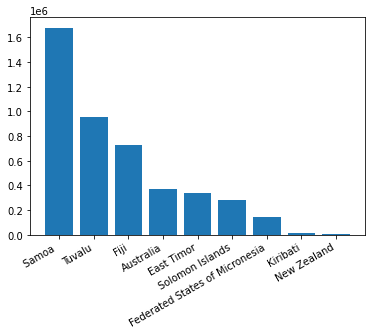

In [17]:
fig, ax = plt.subplots()
ax.bar(dff["Country"], dff["Total Profit"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

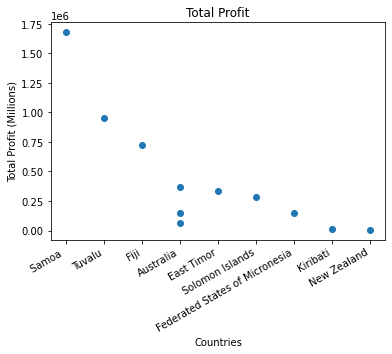

In [18]:
fig, ax = plt.subplots()
plt.scatter(dff["Country"], dff["Total Profit"])
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xlabel("Countries")
ax.set_ylabel("Total Profit (Millions)")
ax.set_title("Total Profit")
plt.show()

In [19]:
# import libraries 
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt

def data_filter(): 
  #filter to the OCE/AUS region
  df = pd.read_csv('sales.csv')
  oce_df = df.loc[df['Region'] == 'Australia and Oceania']

  #Reset the index to clean the data and drop the old index
  oce_df = oce_df.reset_index(drop=True)

  #Dropping a redundant column
  oce_df.drop(['Region'], axis=1, inplace=True)

  #Sorting data in a way to display it using groupby
  #This probably the best way to display information without compromising the data itself

  organised_data = oce_df.groupby(["Total Profit"]).max().sort_values('Total Profit', ascending=False)

  organised_data.to_csv('sales_fixed.csv')

def min_max_mean(): 
  #Reads the new CSV file
  dff = pd.read_csv('sales_fixed.csv')
  
  #allocates where in the file to find the min, max, mean and the associated country
  max_prof = dff.iloc[0,0]
  max_country = dff.iloc[0,1]
  min_prof = dff.iloc[10,0]
  min_country = dff.iloc[10,1]
  mean_prof = round(dff["Total Profit"].mean(),2)

  #Prints the located data
  print(max_country + str(max_prof))
  print(min_country + str(min_prof))
  print("The average for the total profit for the region is " + str(mean_prof))


data_filter()
min_max_mean()

Samoa 1678540.98
New Zealand5270.67
The average for the total profit for the region is 429287.28
